In [51]:
from __future__ import print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne

import ecogtools
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
mne.set_log_level(verbose=False)

In [3]:
patient_num = "2002"
channels = ['RTG22', 'RTG23', 'RTG24', 'RTG30', 'RTG31', 'RTG32', 'RTG38', 'RTG39', 'RTG40', 'RTG46', 'RTG47', 'RTG48']

In [6]:
data = ecogtools.ToM_Localizer(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)


This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [26]:
freqs = np.linspace(80, 150, 25)
n_cycles = freqs/2.0
time_bandwidth = 8.0

# Calculate power for Time of Response
belief_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['b/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
photo_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['p/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power = data.compute_diff_power(belief_tr_power, photo_tr_power)

In [13]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

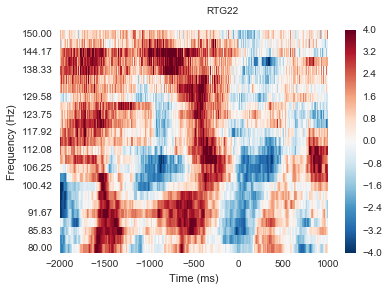

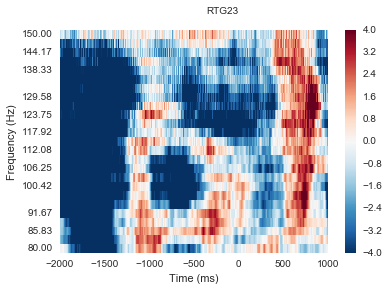

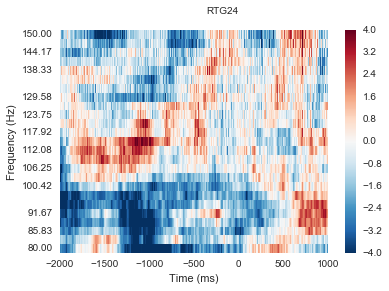

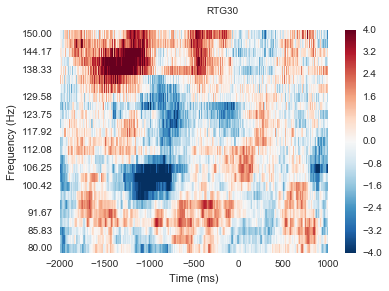

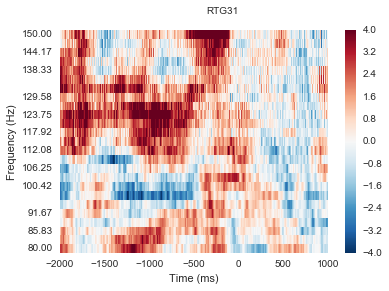

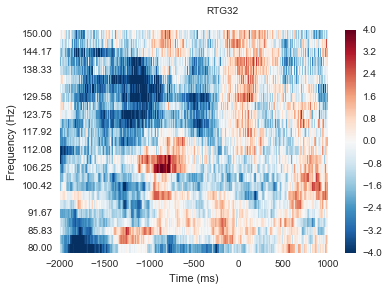

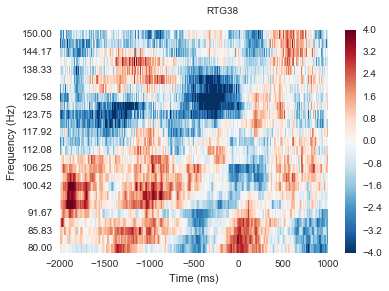

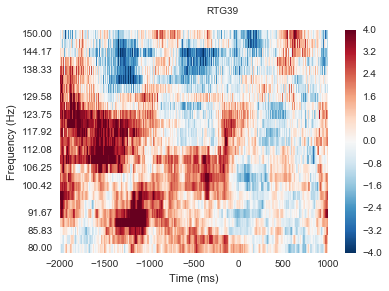

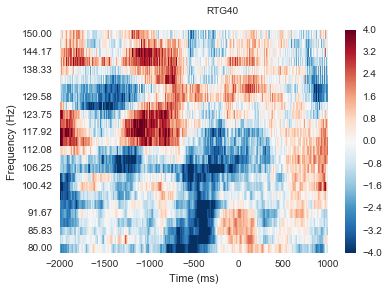

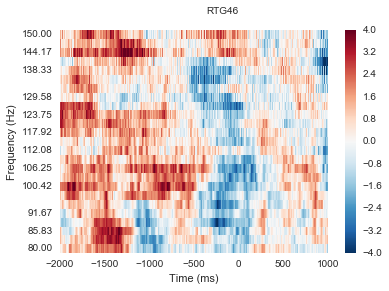

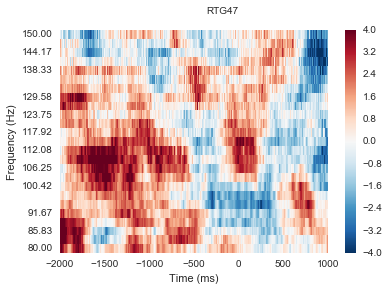

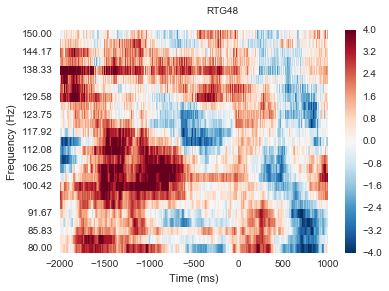

In [25]:
for i in range(len(channels)):
    TR_power.plot([i], baseline=TR_baseline, mode='ratio', dB=True, vmin=-4, vmax=4, title=channels[i], **TR_times);

In [30]:
patient_num = "2003"
channels = ['LTG5', 'LTG6', 'LTG7', 'LTG8', 'LTG13', 'LTG14', 'LTG15', 'LTG16', 'LTG21', 'LTG22', 'LTG23', 'LTG24']

In [31]:
data = ecogtools.ToM_Localizer(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)


This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [32]:
freqs = np.linspace(80, 150, 25)
n_cycles = freqs/2.0
time_bandwidth = 8.0

# Calculate power for Time of Response
belief_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['b/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
photo_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['p/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power = data.compute_diff_power(belief_tr_power, photo_tr_power)

In [33]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

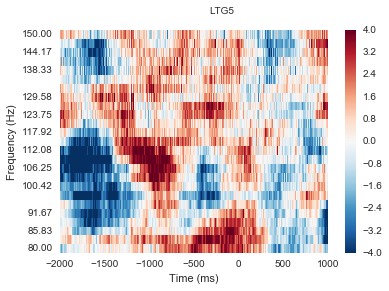

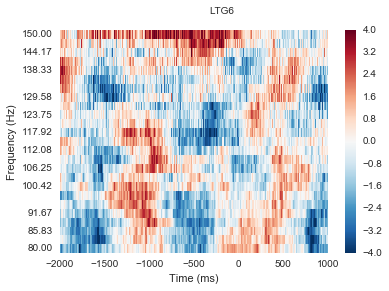

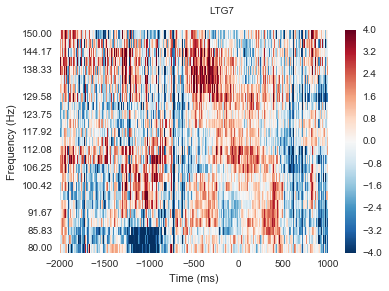

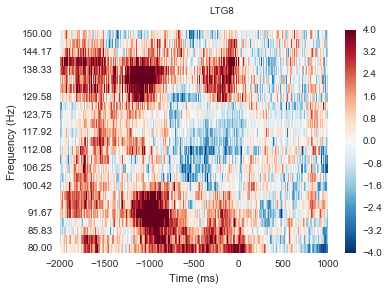

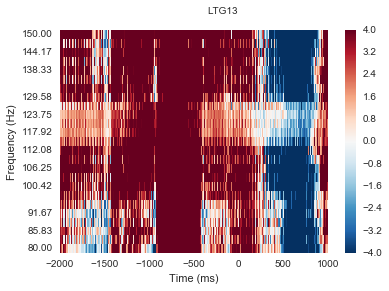

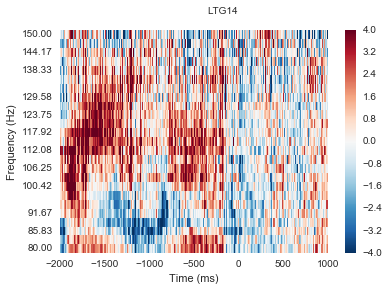

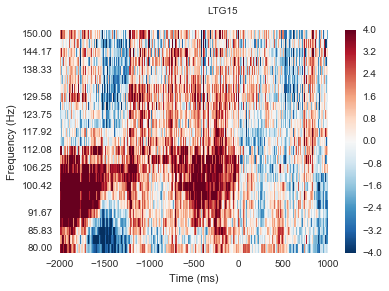

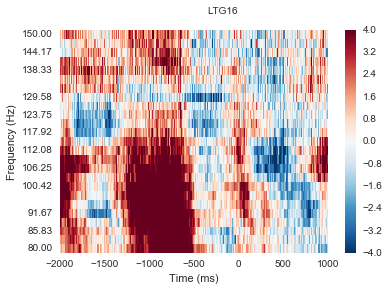

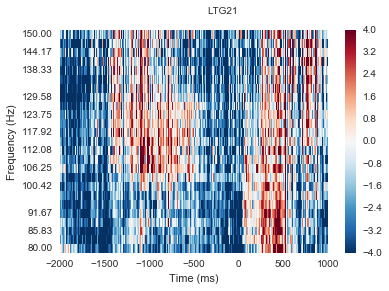

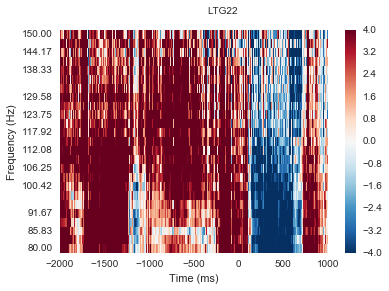

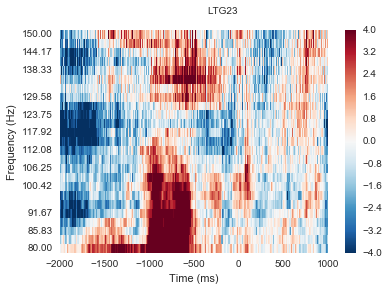

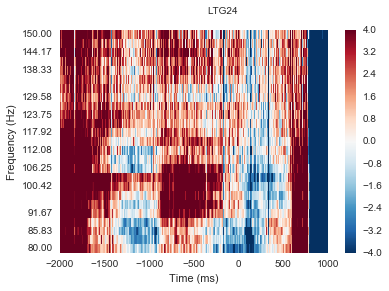

In [34]:
for i in range(len(channels)):
    TR_power.plot([i], baseline=TR_baseline, mode='ratio', dB=True, vmin=-4, vmax=4, title=channels[i], **TR_times);

In [35]:
patient_num = "2007"
channels = ['RFG5', 'RFG6', 'RFG7', 'RFG8', 'RFG13', 'RFG14', 'RFG15', 'RFG16', 'RFG21', 'RFG22', 'RFG23', 'RFG24']
#channels = ['RFG22', 'RFG23', 'RFG24', 'RFG30', 'RFG31', 'RFG32', 'RFG38', 'RFG39', 'RFG40', 'RFG46', 'RFG47', 'RFG48']

In [36]:
data = ecogtools.ToM_Localizer(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)


This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [37]:
freqs = np.linspace(80, 150, 25)
n_cycles = freqs/2.0
time_bandwidth = 8.0

# Calculate power for Time of Response
belief_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['b/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
photo_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['p/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power = data.compute_diff_power(belief_tr_power, photo_tr_power)

In [38]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

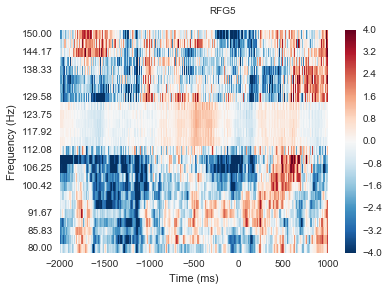

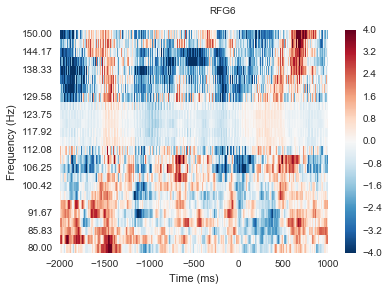

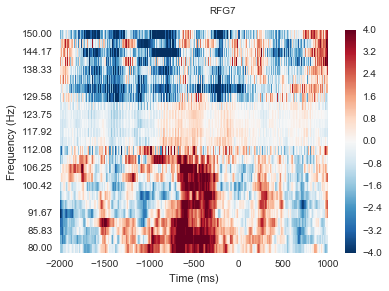

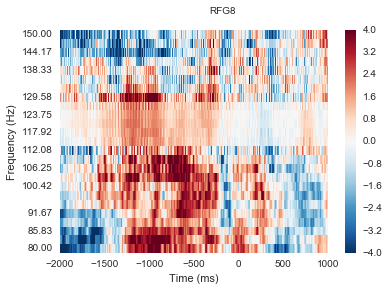

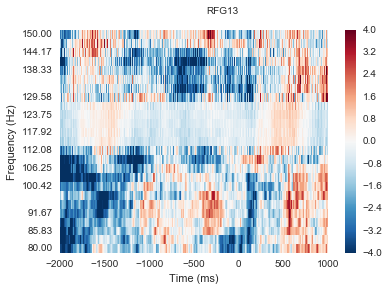

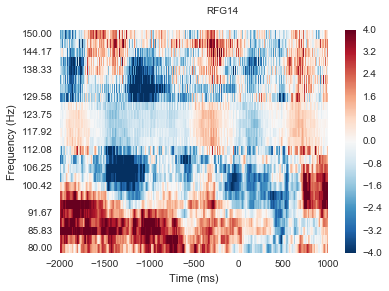

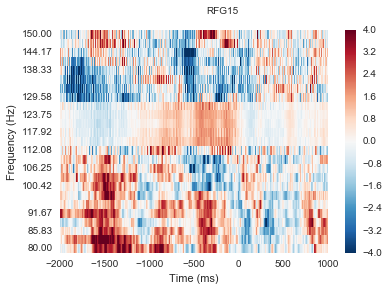

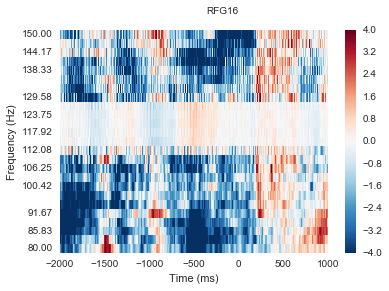

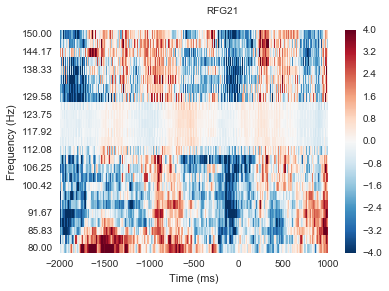

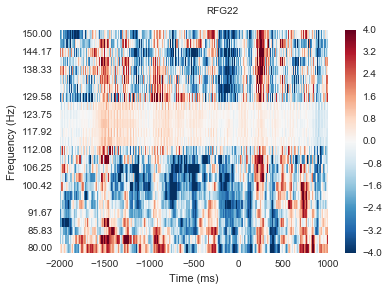

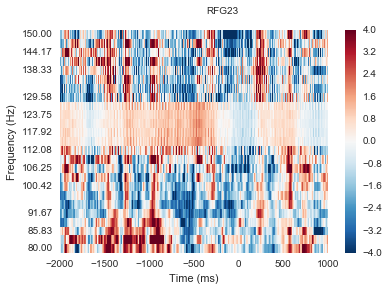

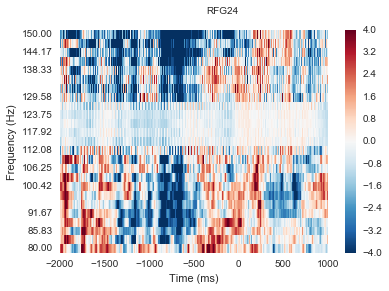

In [39]:
for i in range(len(channels)):
    TR_power.plot([i], baseline=TR_baseline, mode='ratio', dB=True, vmin=-4, vmax=4, title=channels[i], **TR_times);

# ToM and Attention Task 

In [68]:
patient_num = "2002"
channels = ['RTG22', 'RTG23', 'RTG24', 'RTG30', 'RTG31', 'RTG32', 'RTG38', 'RTG39', 'RTG40', 'RTG46', 'RTG47', 'RTG48']

In [69]:
data = ecogtools.ToM_2010(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)


This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [70]:
# Calculate power for Time of Response for mental/physical
mental_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['mental/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
physical_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['physical/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power_MP = data.compute_diff_power(mental_tr_power, physical_tr_power)

# Calculate power for Time of Response for expected/unexpected
expected_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['expected/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
unexpected_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['unexpected/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power_EU = data.compute_diff_power(expected_tr_power, unexpected_tr_power)

In [71]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

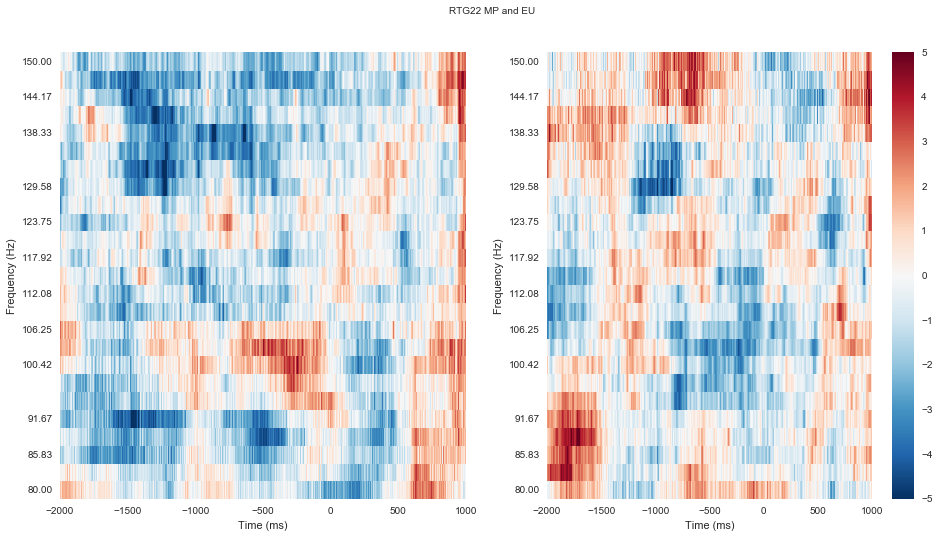

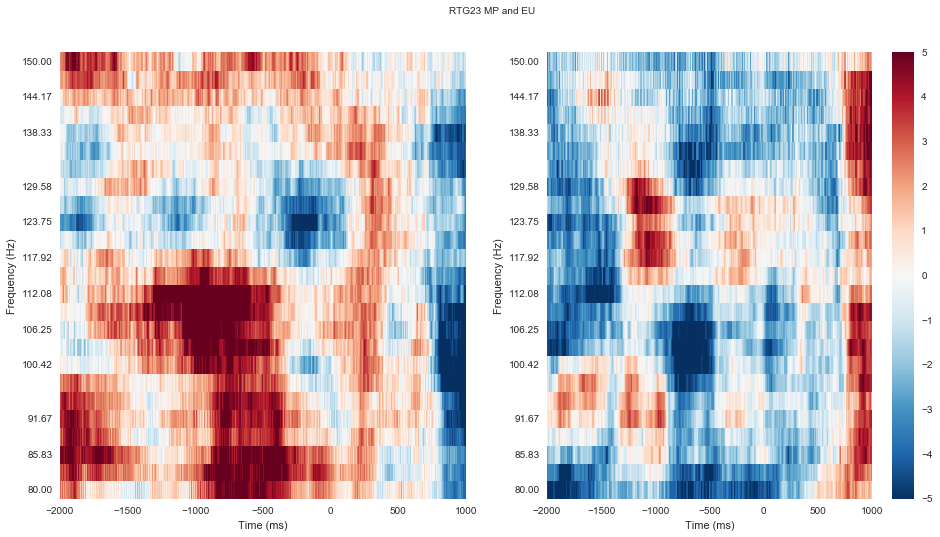

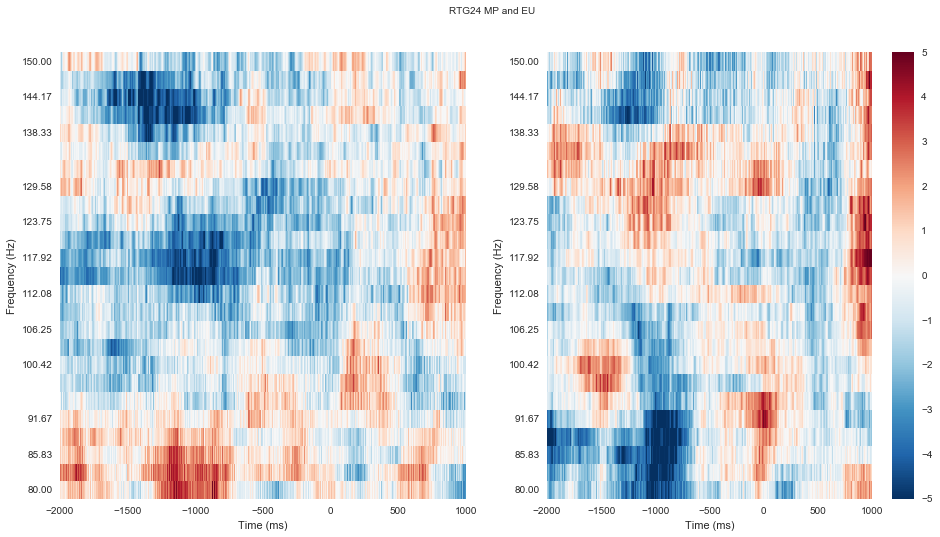

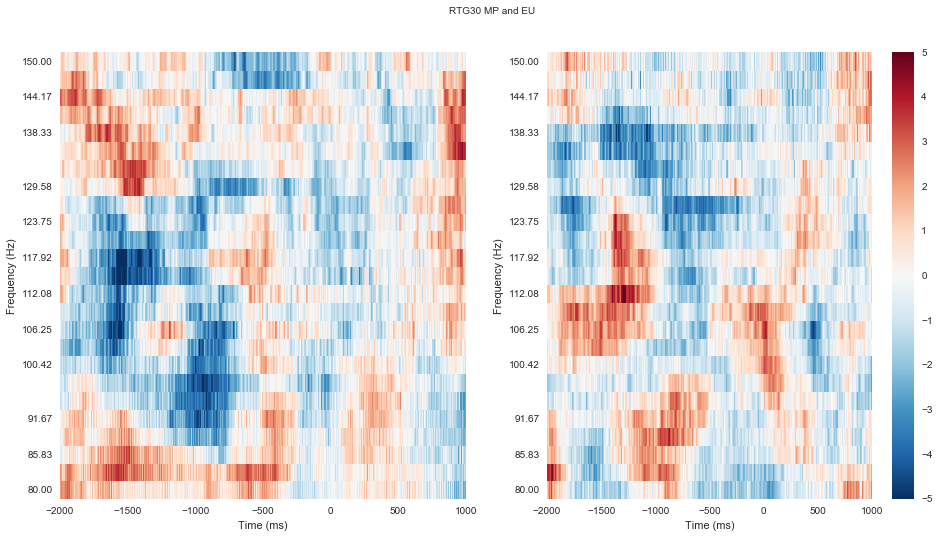

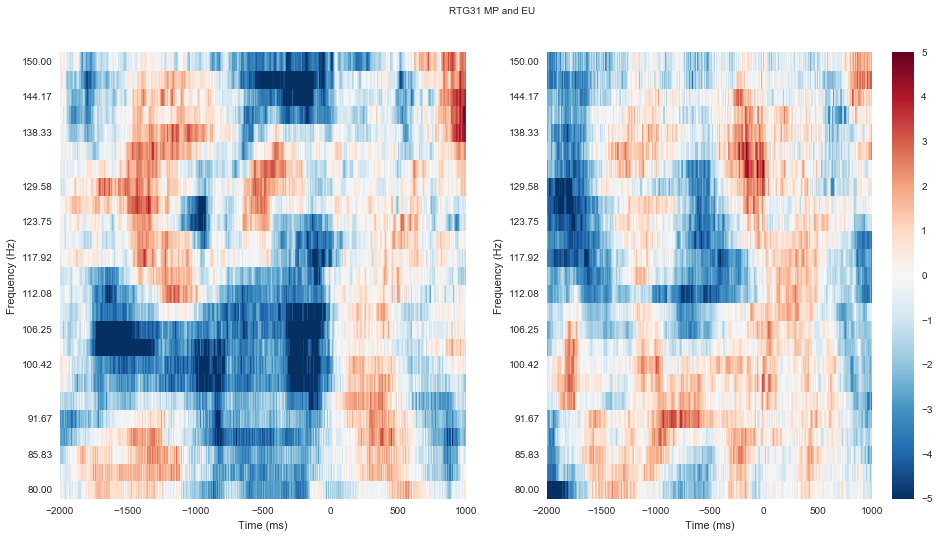

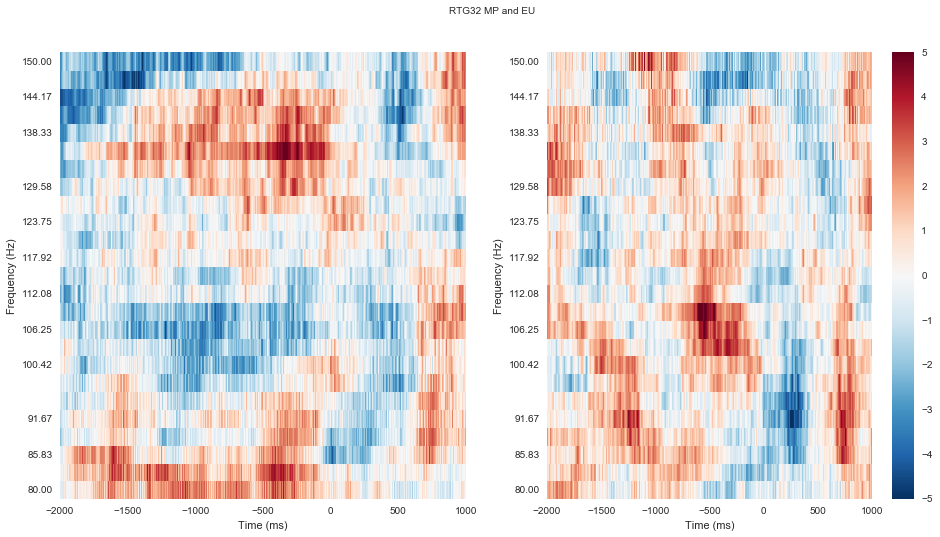

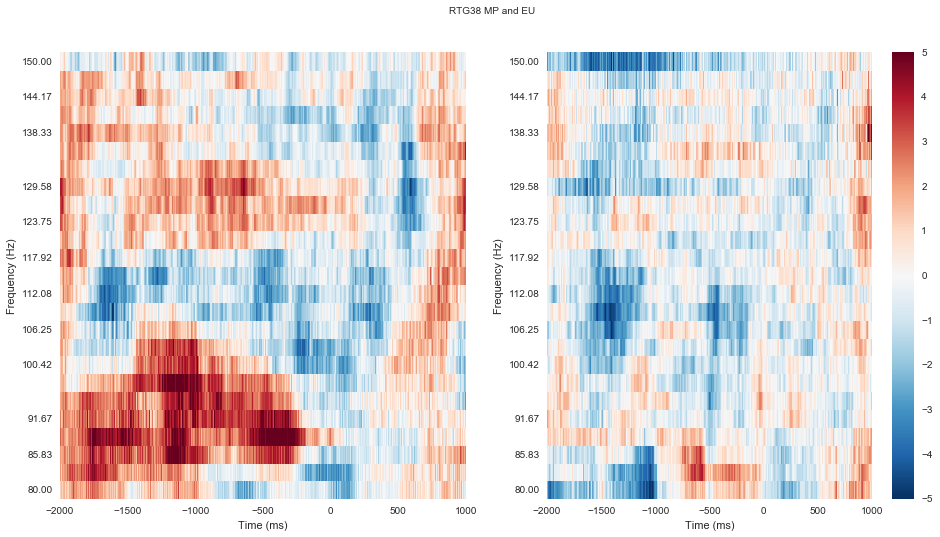

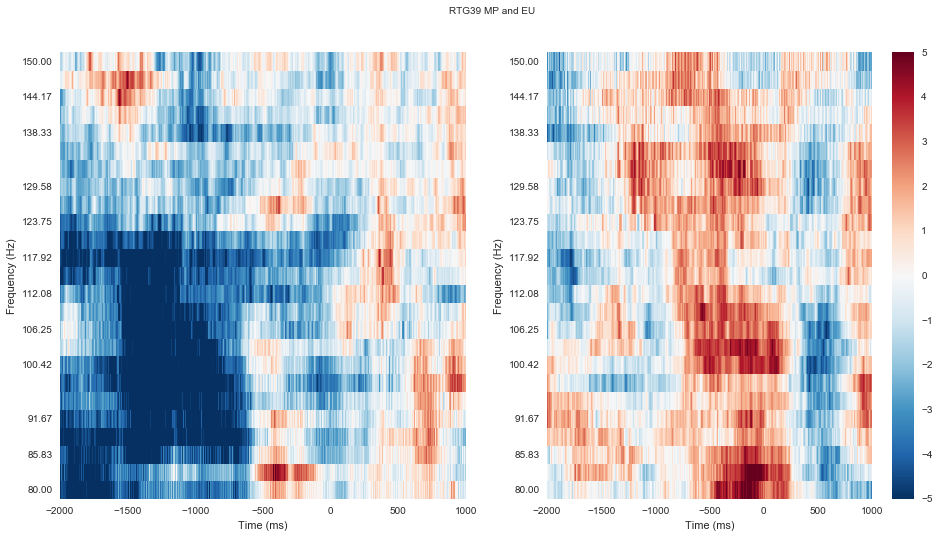

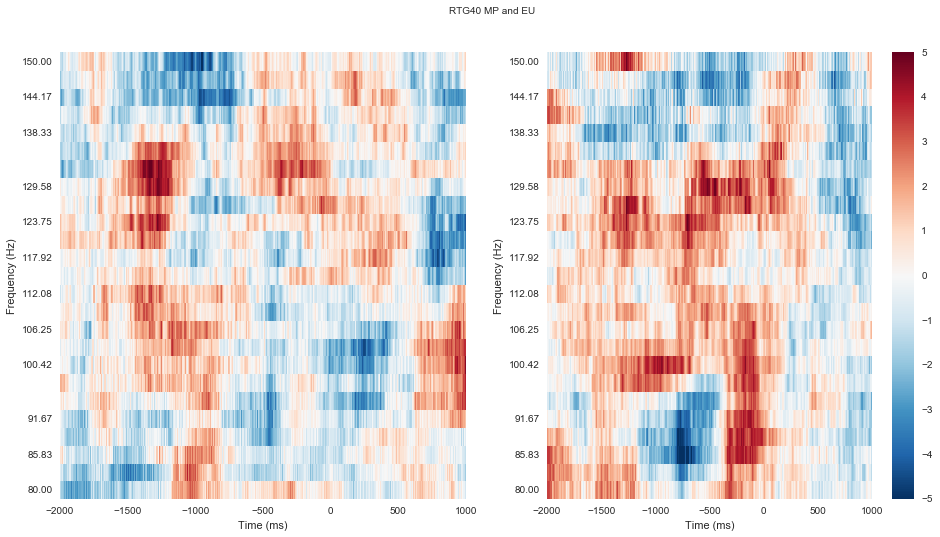

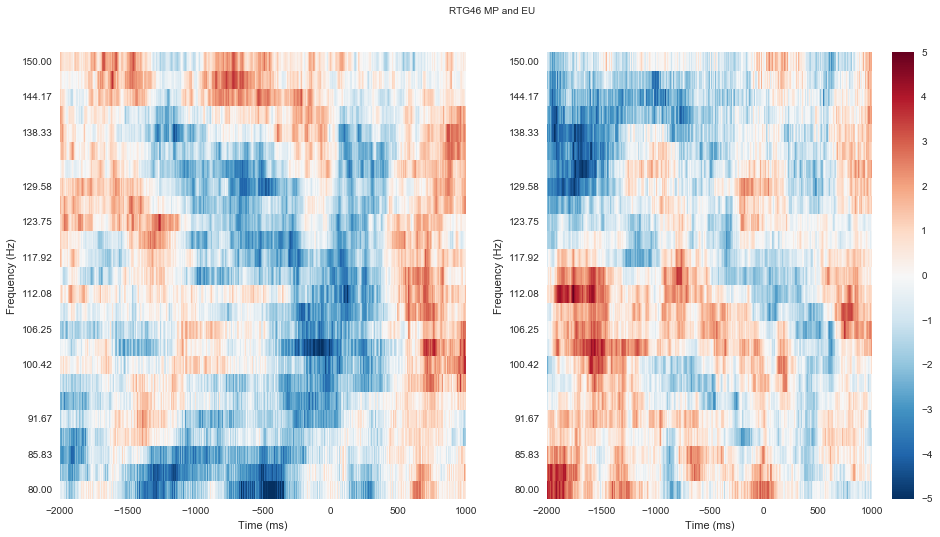

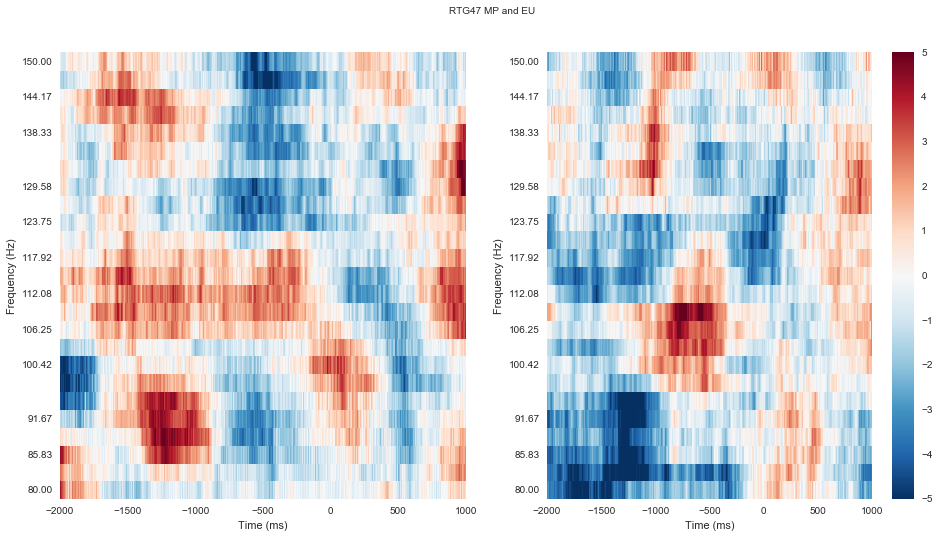

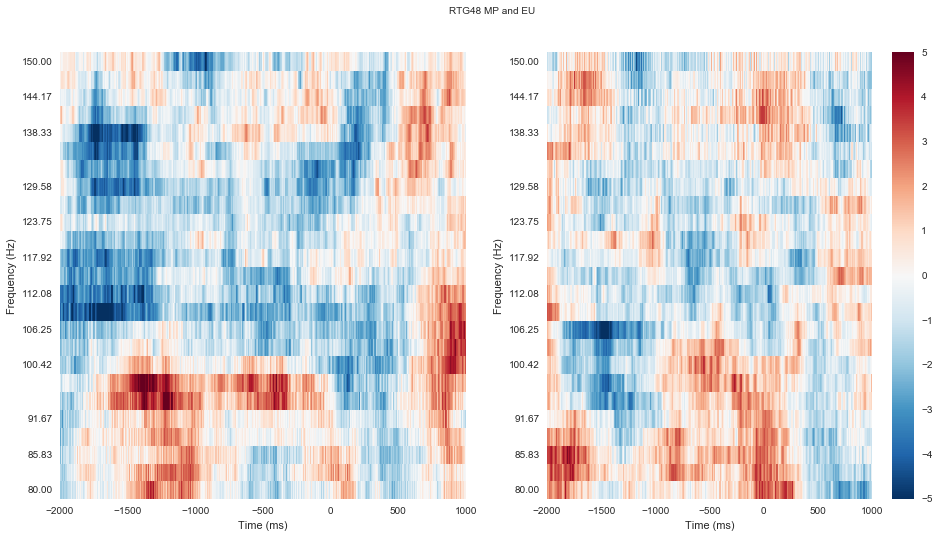

In [72]:
for i in range(len(channels)):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    TR_power_MP.plot([i], baseline=TR_baseline, mode='ratio', dB=True, axes=axes[0], show=False, vmin=-5., vmax=5., colorbar=False, **TR_times);
    TR_power_EU.plot([i], baseline=TR_baseline, mode='ratio', dB=True, axes=axes[1], vmin=-5., vmax=5., title=channels[i]+" MP and EU", **TR_times);

In [73]:
patient_num = "2003"
channels = ['LTG5', 'LTG6', 'LTG7', 'LTG8', 'LTG13', 'LTG14', 'LTG15', 'LTG16', 'LTG21', 'LTG22', 'LTG23', 'LTG24']

In [74]:
data = ecogtools.ToM_2010(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)


This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [75]:
# Calculate power for Time of Response for mental/physical
mental_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['mental/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
physical_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['physical/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power_MP = data.compute_diff_power(mental_tr_power, physical_tr_power)

# Calculate power for Time of Response for expected/unexpected
expected_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['expected/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
unexpected_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['unexpected/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power_EU = data.compute_diff_power(expected_tr_power, unexpected_tr_power)

In [76]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

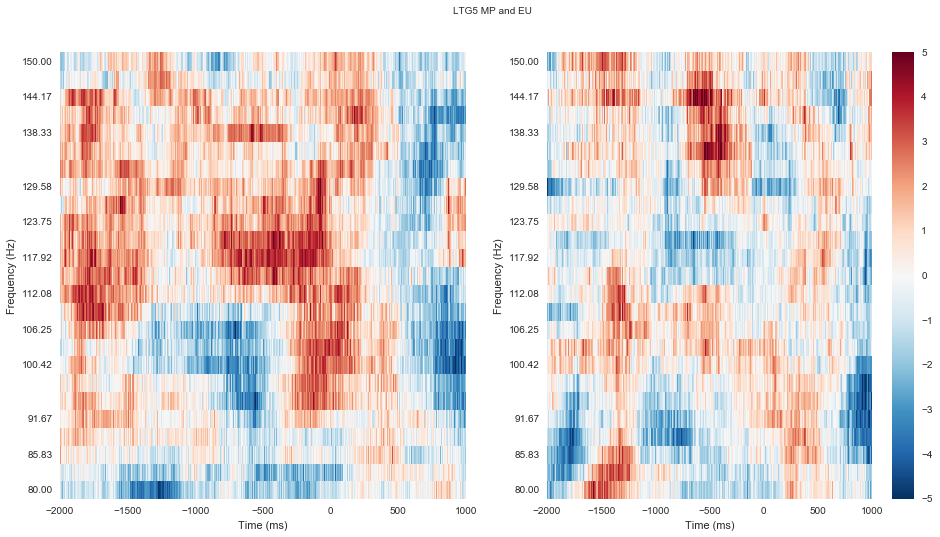

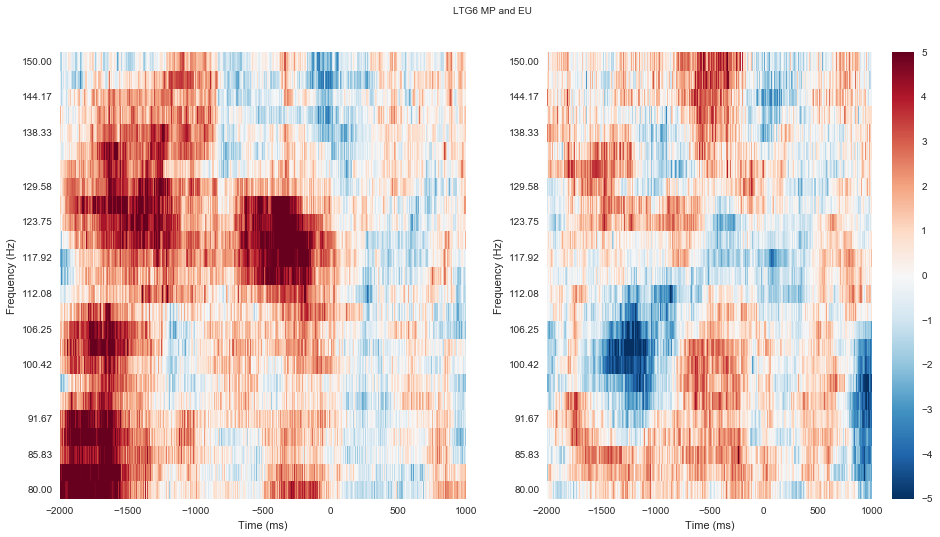

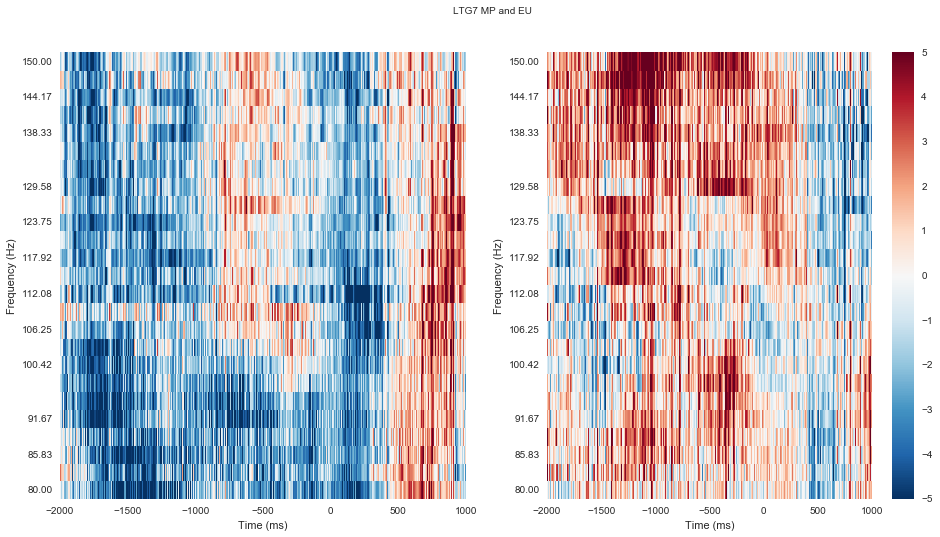

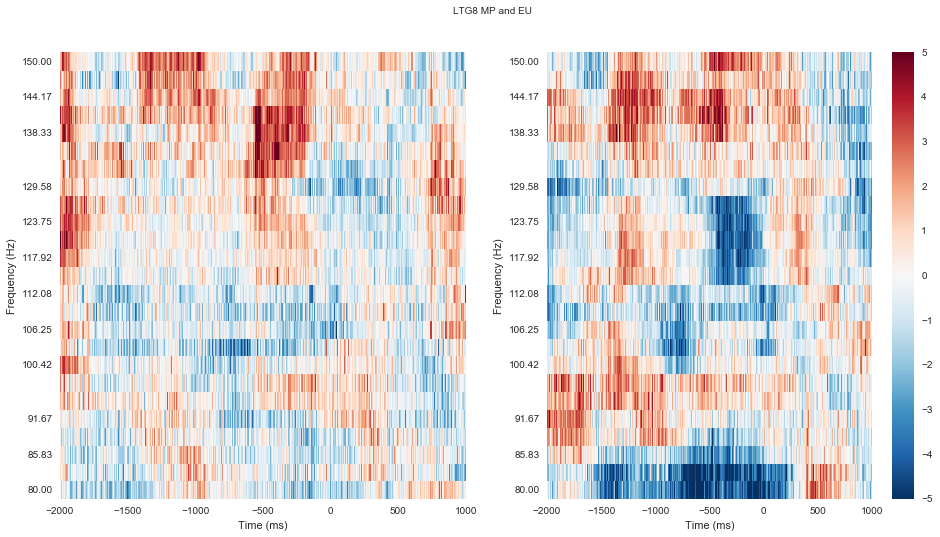

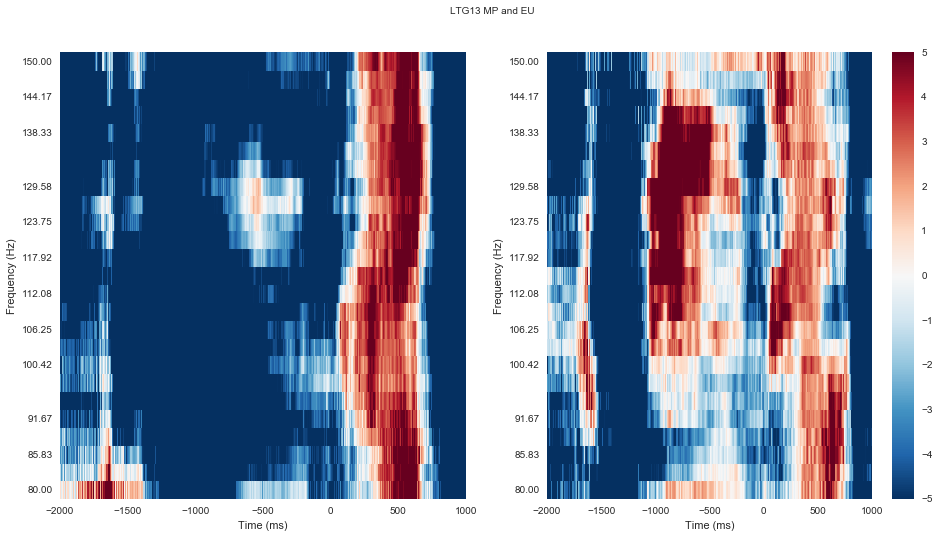

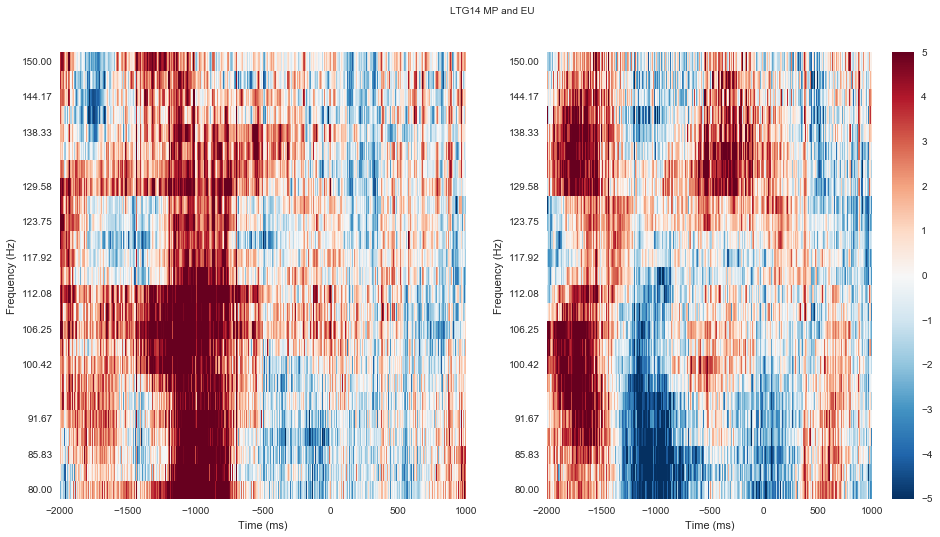

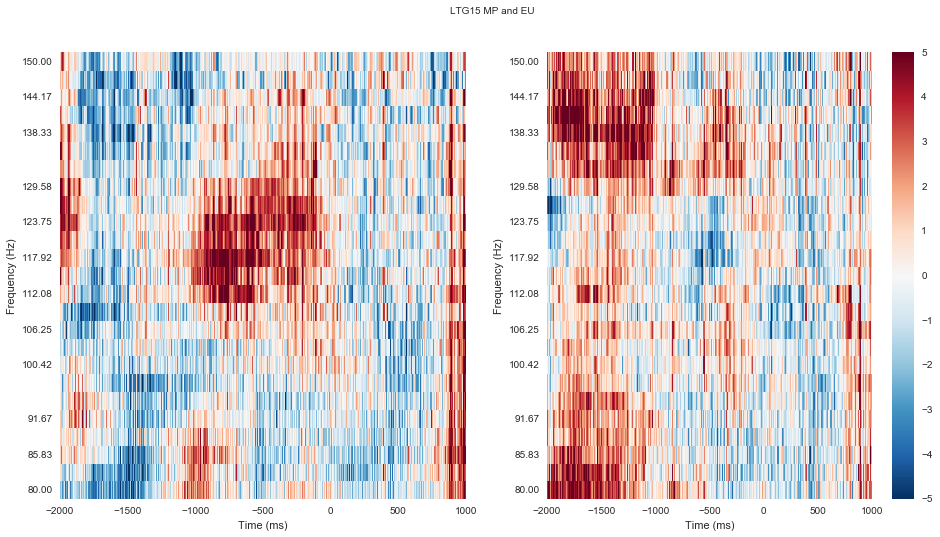

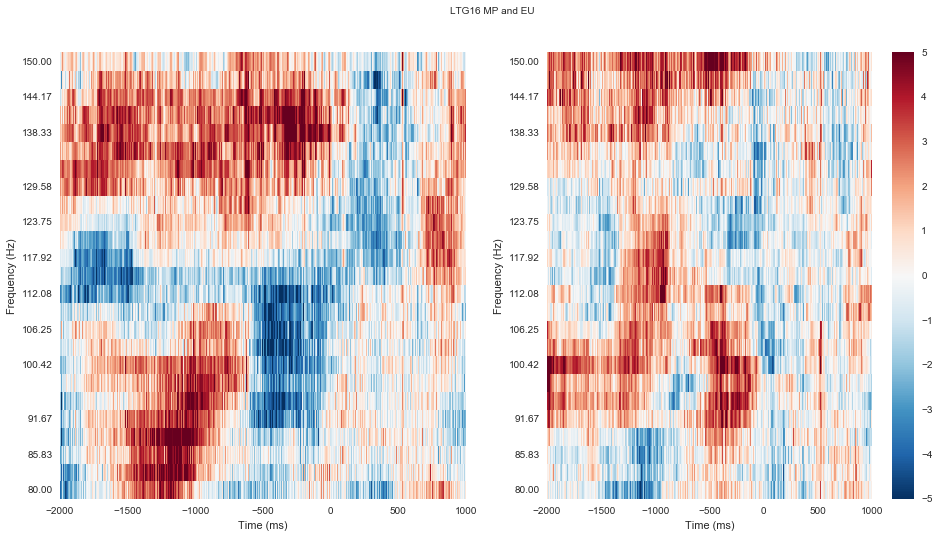

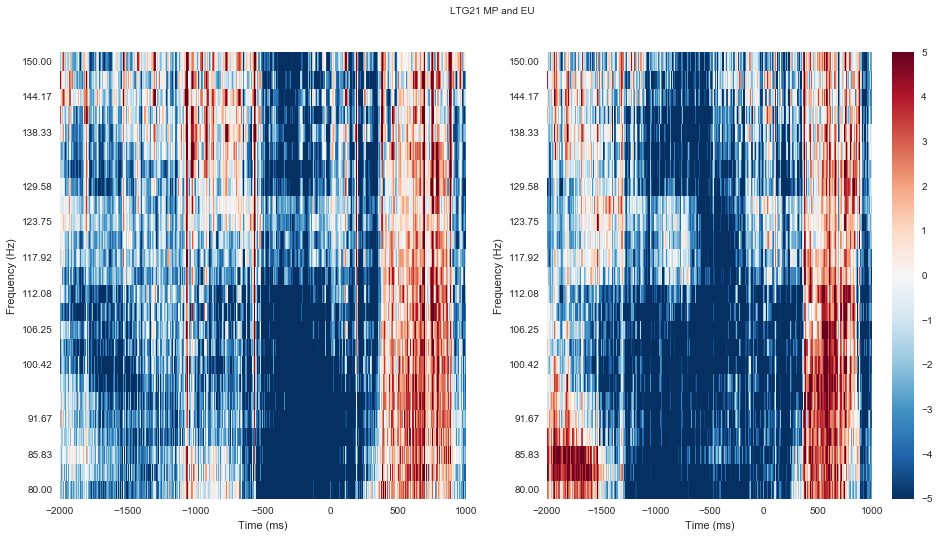

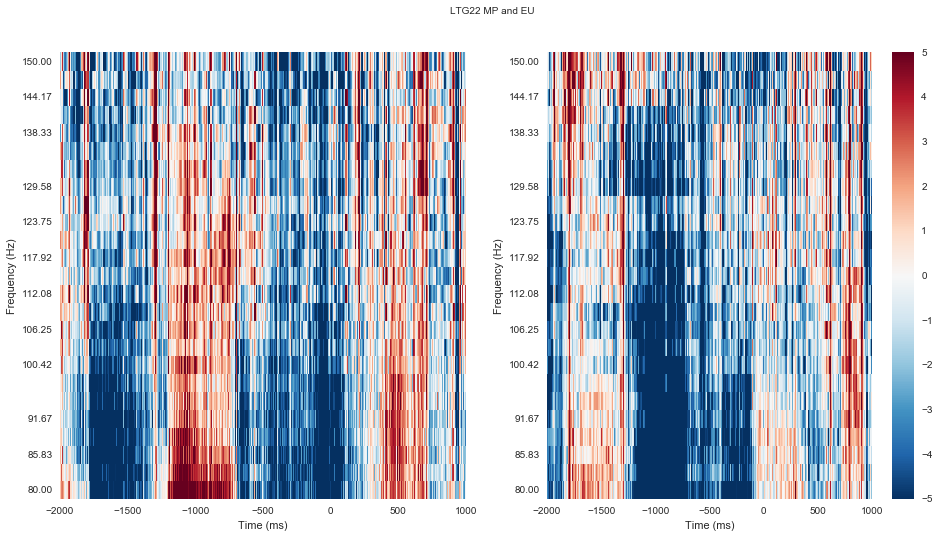

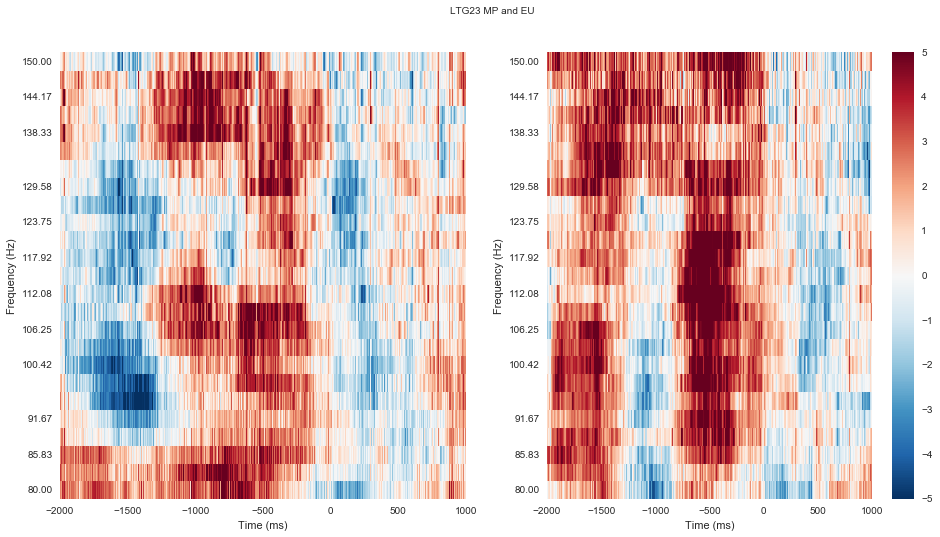

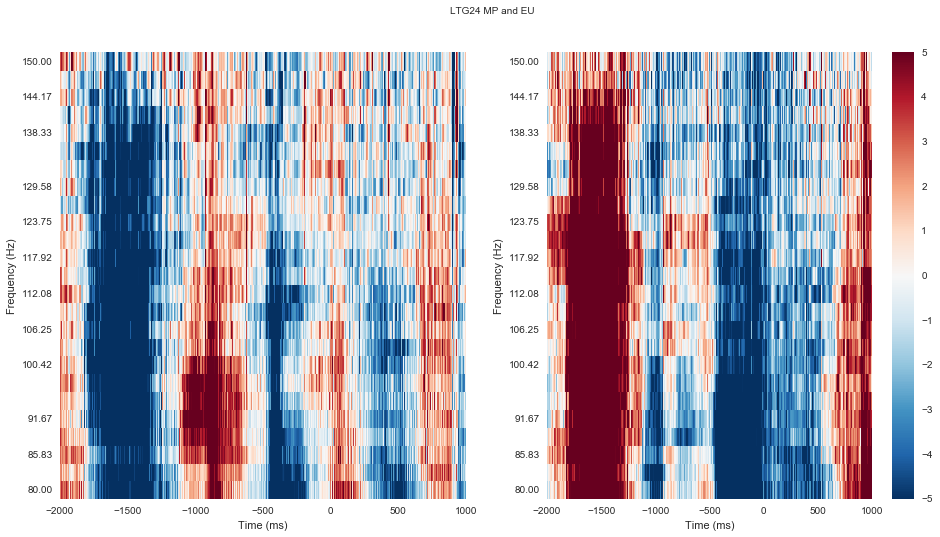

In [77]:
for i in range(len(channels)):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    TR_power_MP.plot([i], baseline=TR_baseline, mode='ratio', dB=True, axes=axes[0], show=False, vmin=-5., vmax=5., colorbar=False, **TR_times);
    TR_power_EU.plot([i], baseline=TR_baseline, mode='ratio', dB=True, axes=axes[1], vmin=-5., vmax=5., title=channels[i]+" MP and EU", **TR_times);

In [78]:
patient_num = "2007"
channels = ['RFG5', 'RFG6', 'RFG7', 'RFG8', 'RFG13', 'RFG14', 'RFG15', 'RFG16', 'RFG21', 'RFG22', 'RFG23', 'RFG24']
#channels = ['RFG22', 'RFG23', 'RFG24', 'RFG30', 'RFG31', 'RFG32', 'RFG38', 'RFG39', 'RFG40', 'RFG46', 'RFG47', 'RFG48']

In [79]:
data = ecogtools.ToM_2010(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.initialize_epochs_object(channels, tmin=-4., tmax=2., baseline=None)


This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [80]:
# Calculate power for Time of Response for mental/physical
mental_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['mental/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
physical_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['physical/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power_MP = data.compute_diff_power(mental_tr_power, physical_tr_power)

# Calculate power for Time of Response for expected/unexpected
expected_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['expected/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
unexpected_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['unexpected/time_of_response'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
TR_power_EU = data.compute_diff_power(expected_tr_power, unexpected_tr_power)

In [81]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

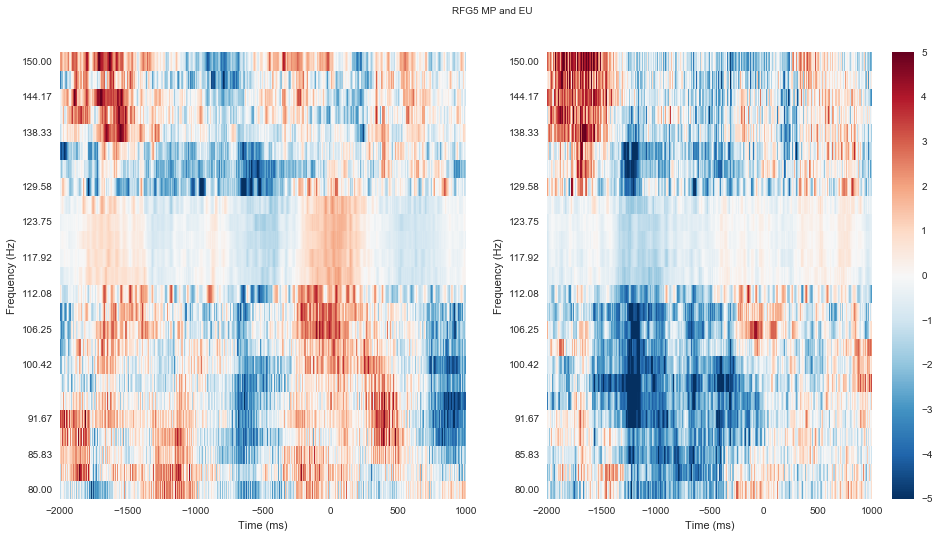

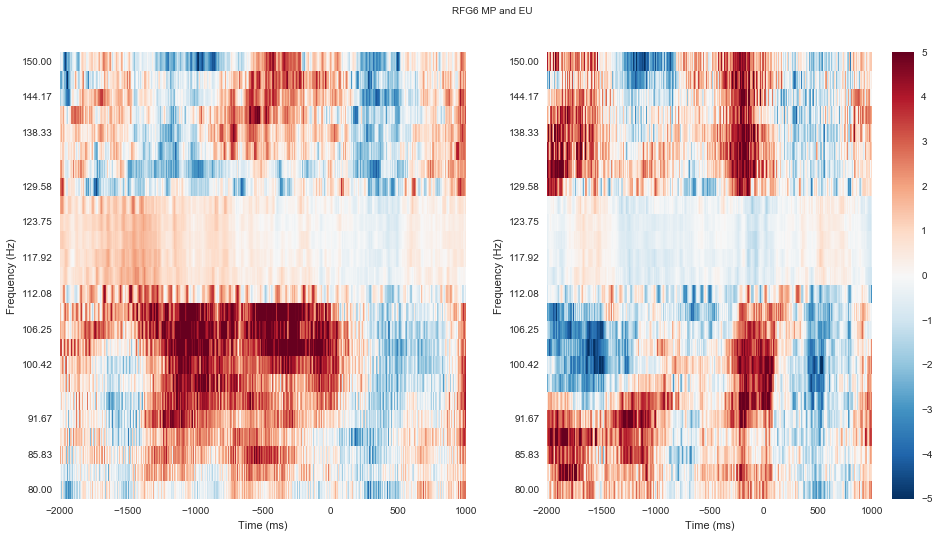

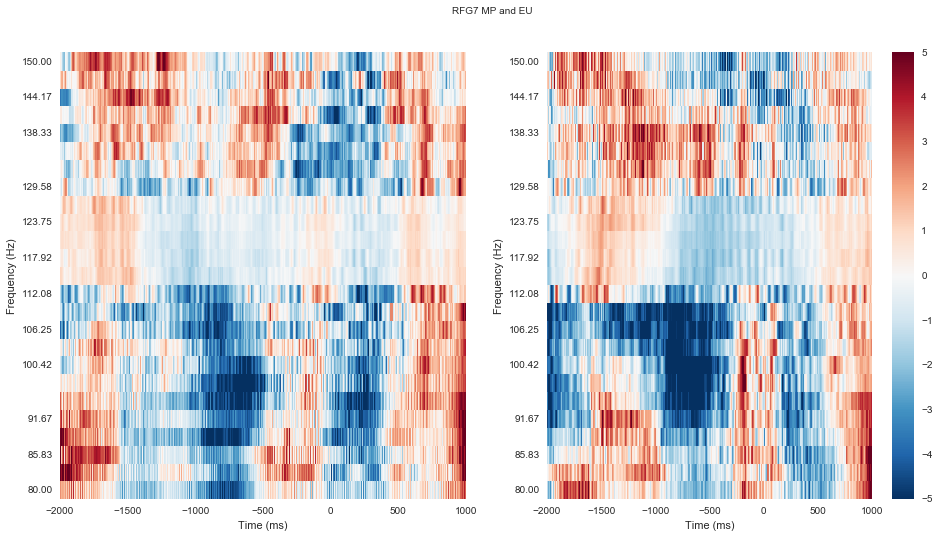

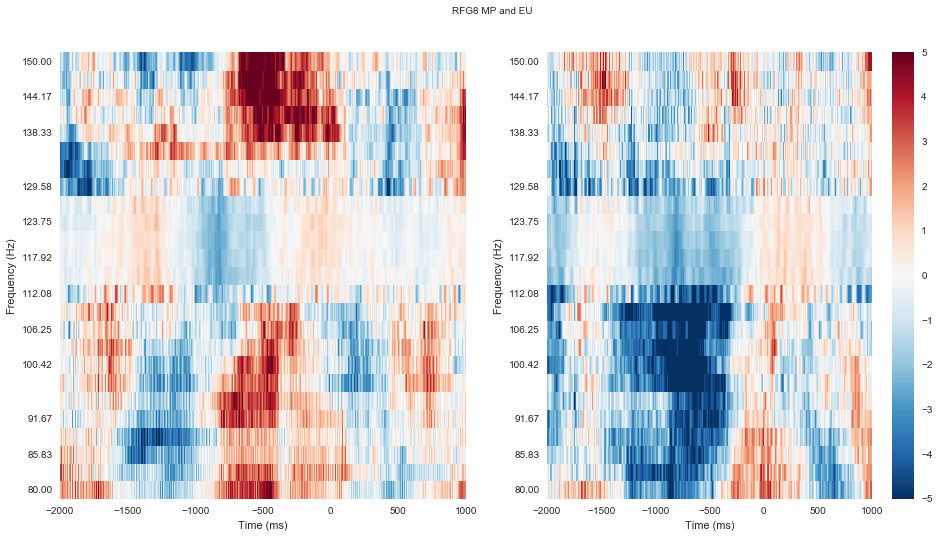

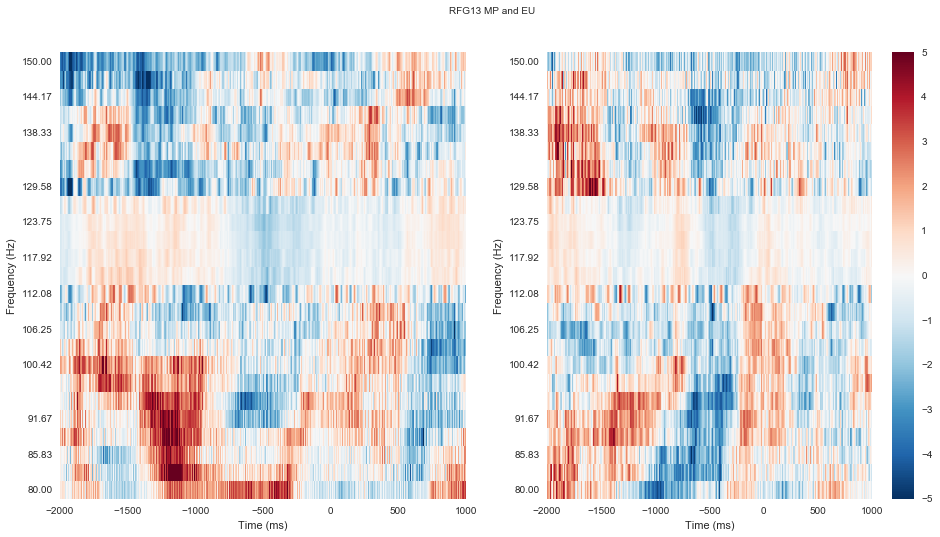

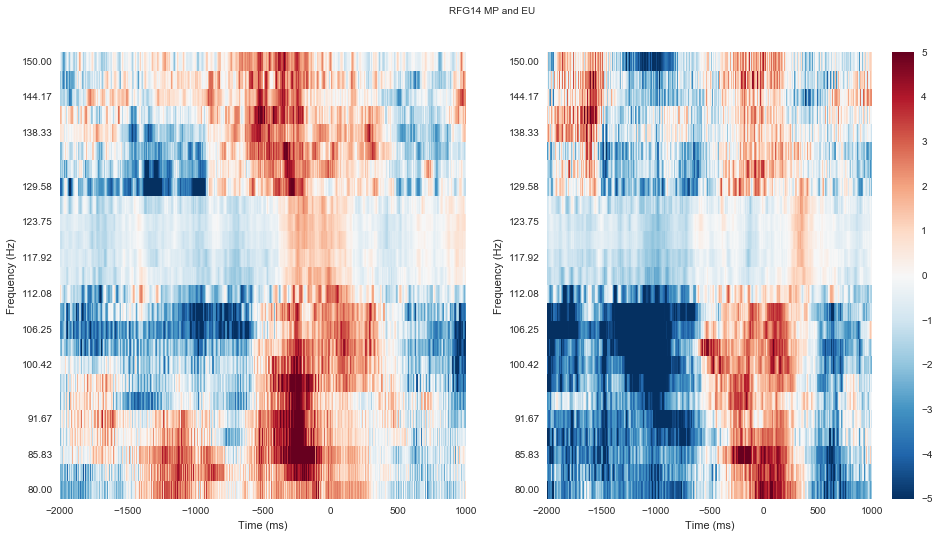

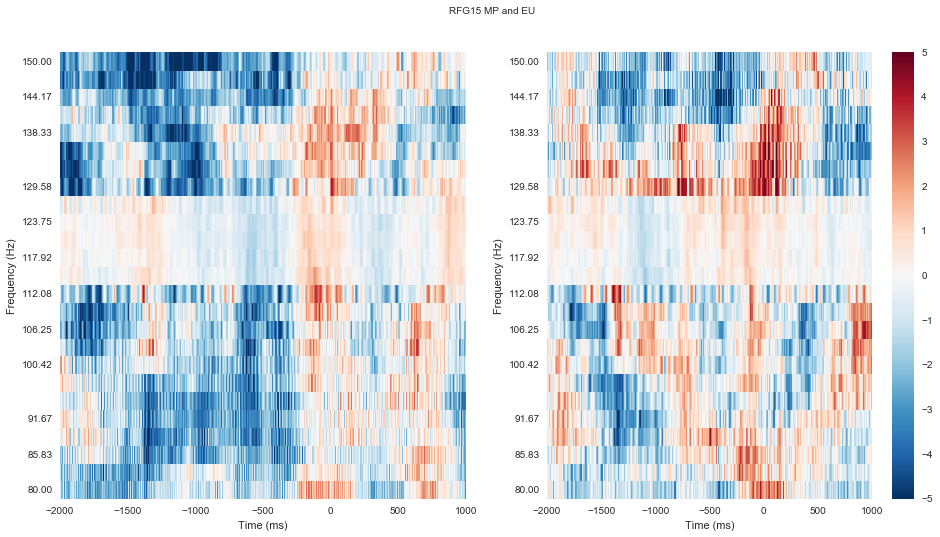

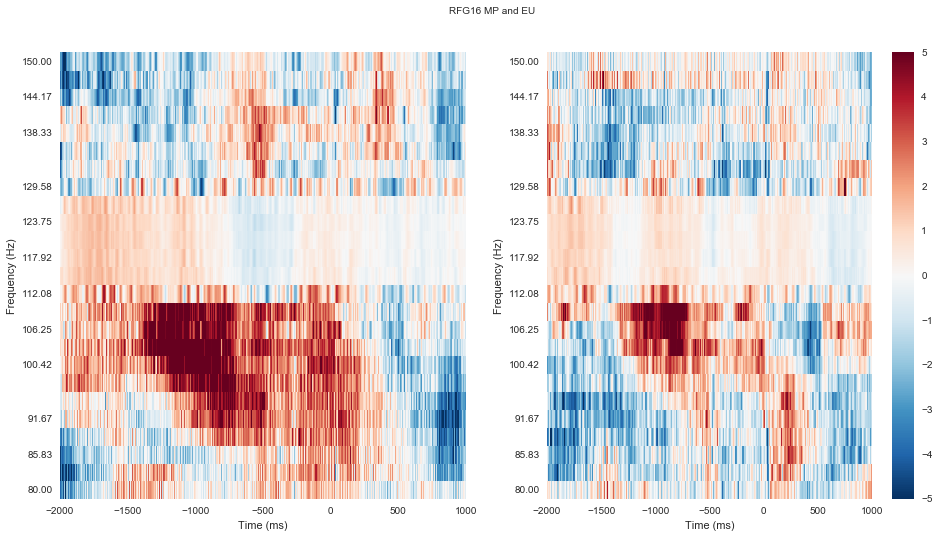

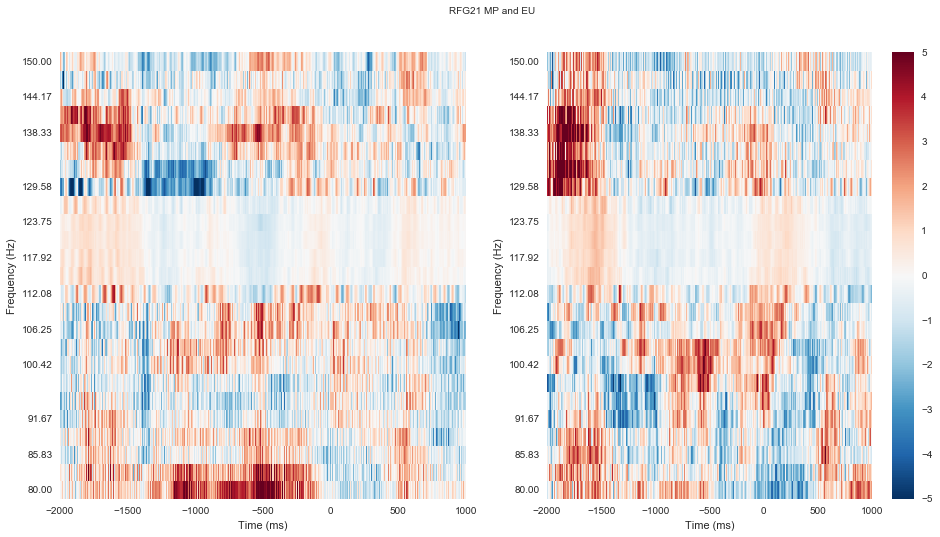

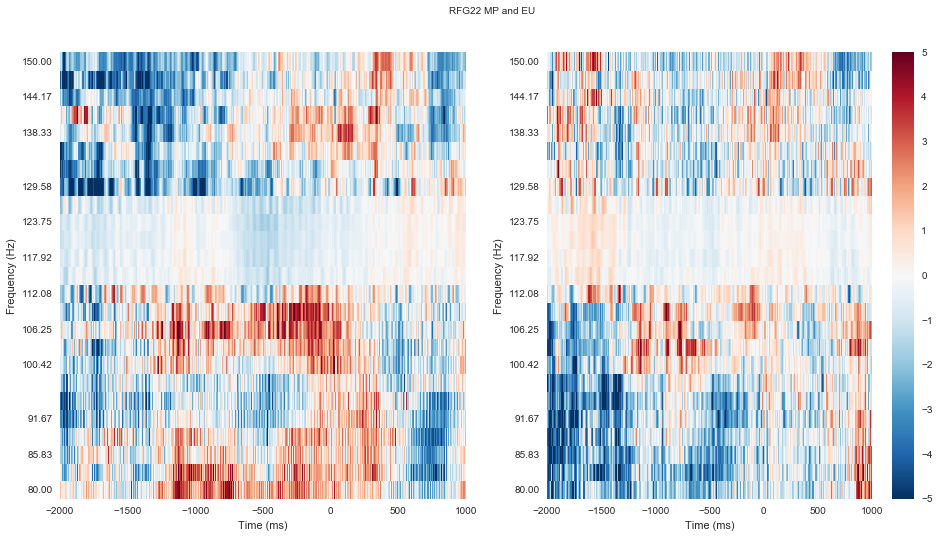

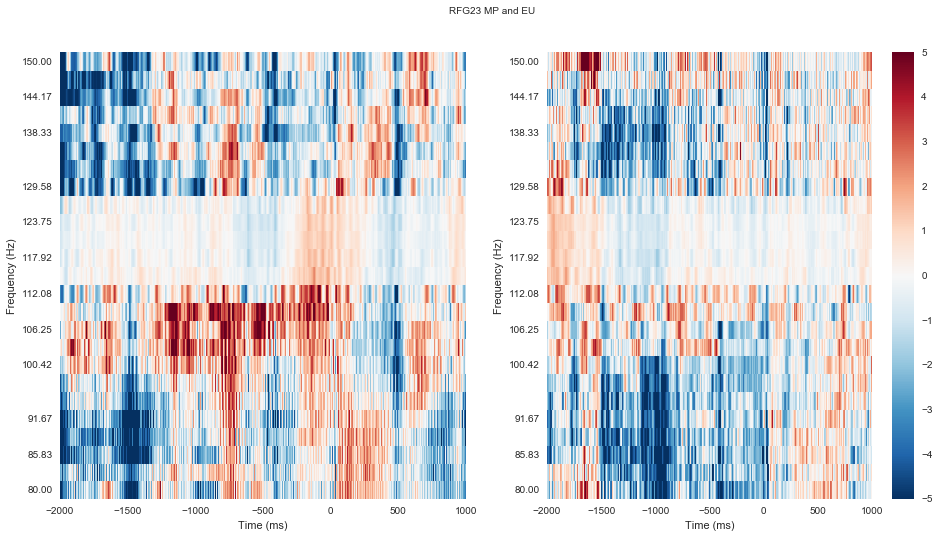

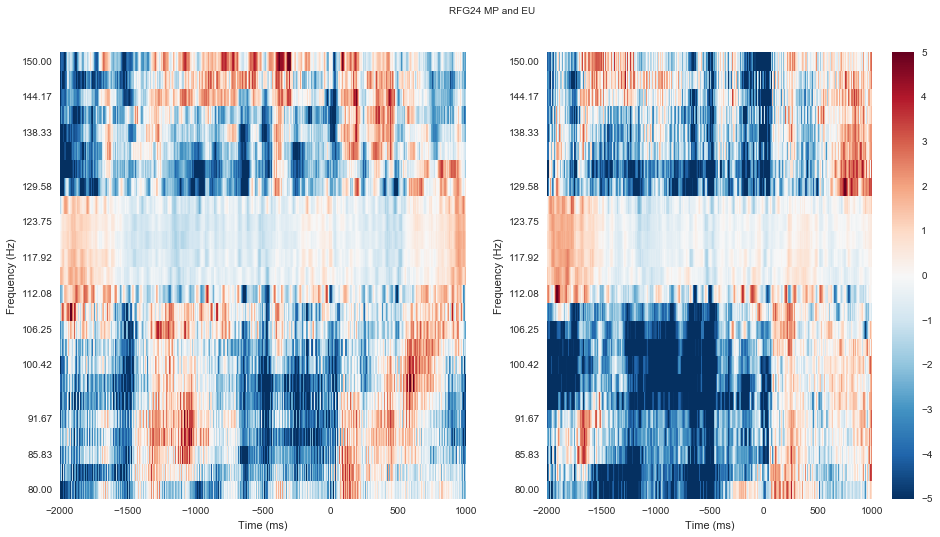

In [82]:
for i in range(len(channels)):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    TR_power_MP.plot([i], baseline=TR_baseline, mode='ratio', dB=True, axes=axes[0], show=False, vmin=-5., vmax=5., colorbar=False, **TR_times);
    TR_power_EU.plot([i], baseline=TR_baseline, mode='ratio', dB=True, axes=axes[1], vmin=-5., vmax=5., title=channels[i]+" MP and EU", **TR_times);